# Stragi for analyse
Prep the dataset for training

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Read the dataframe
df = pd.read_csv(".\stud-stat-anonymous.csv")

In [3]:
#Create a new dataframe, that store the prep data
d = {'student': [], 'team': [], 'absence': [],'isClass': []}
newdf= pd.DataFrame(data=d)

In [4]:
newdf

,student,team,absence,isClass


In [5]:
#insert multi rows pr student, so that's not spars that in the set
for index, row in df.iterrows():
    #row["Fag"]
    #newdf = newdf.append({'student':row['Id'],'Class':row['Klasse']}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Klasse'],'absence':row['Samlet fravær'],'isClass':True}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Fag'],'absence':row['Fravær'],'isClass':False}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Fag.1'],'absence':row['Fravær.1'],'isClass':False}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Fag.2'],'absence':row['Fravær.2'],'isClass':False}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Fag.3'],'absence':row['Fravær.3'],'isClass':False}, ignore_index=True)
                         


In [6]:
newdf

,student,team,absence,isClass
0,214366.0,Web and Soft Electives,100%,1.0
1,214366.0,Big Data,100%,0.0
2,214366.0,NaN,NaN,0.0
3,214366.0,NaN,NaN,0.0
4,214366.0,NaN,NaN,0.0
5,680092.0,Web and Soft Electives,100%,1.0
6,680092.0,Angular,100%,0.0
7,680092.0,Web Security,100%,0.0
8,680092.0,NaN,NaN,0.0
9,680092.0,NaN,NaN,0.0


In [7]:
#drop any spars data
newdf = newdf.dropna()

In [8]:
#convert the absence from a string to float and removing the % symbole

arr =newdf["absence"].values
tmp = []
for x in arr:
    x= float(x.replace('%', '')) 
    tmp.append(x)
    
newdf =newdf.drop(['absence'], axis=1)
newdf['absence'] = tmp


In [9]:

newdf['absence'].unique()


array([100.  ,  96.9 ,   0.  ,  90.9 ,  80.  ,  88.5 ,  72.22,  88.  ,
        79.31,  87.7 ,  85.71,  87.88,  86.2 ,  68.75,  63.64,  55.56,
        85.5 ,  50.  ,  84.6 ,  77.  ,  61.11,  87.5 ,  88.89,  72.4 ,
        68.42,  75.  ,  72.1 ,  81.82,  71.3 ,  71.2 ,  18.18,  70.1 ,
        66.67,  68.  ,  68.97,  67.8 ,  67.7 ,  57.58,  81.25,  72.73,
        66.7 ,  65.4 ,  73.68,  57.14,  63.6 ,  60.  ,  33.33,  59.8 ,
        44.44,  58.5 ,  92.86,  60.61,  31.25,  57.5 ,  55.2 ,  22.22,
        54.5 ,  16.67,  53.  ,  22.73,  71.43,  51.7 ,  71.05,  37.5 ,
        49.4 ,  37.04,  49.2 ,  55.26,  40.91,  48.8 ,  38.89,  48.6 ,
        28.57,  48.5 ,  48.3 ,  11.11,  47.7 ,  64.29,  18.75,  47.  ,
        36.11,  46.  ,  37.93,  53.7 ,  45.7 ,  81.58,  14.29,  45.5 ,
        44.6 ,  35.71,  41.38,  43.9 ,  53.33,  43.1 ,  42.42,  42.9 ,
        31.03,  42.86,  42.4 ,  30.  ,  52.78,  41.4 ,  78.95,  12.5 ,
        83.33,  25.  ,  40.9 ,  70.  ,  40.7 ,  23.68,  37.9 ,  36.9 ,
      

In [10]:
#remove all rows where the column absence is bigger then 75
newdf = newdf[newdf["absence"] <= 75.0]
#create an team id, so if we want to do ML that takes a parameter team, we can use team id.
team_encode,team_id = newdf['team'].factorize()
newdf["team_id"] = team_encode
columnsTitles=["student","team","team_id","absence","isClass"]
newdf=newdf.reindex(columns=columnsTitles)

In [11]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 117 to 1118
Data columns (total 5 columns):
student    722 non-null float64
team       722 non-null object
team_id    722 non-null int64
absence    722 non-null float64
isClass    722 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 33.8+ KB


In [12]:
newdf.head()

,student,team,team_id,absence,isClass
117,215571.0,IT Governance 2,0,0.00,0.0
122,542155.0,IT Governance 2,0,0.00,0.0
127,825970.0,IT Governance 2,0,0.00,0.0
136,543558.0,Intro til IT Sikkerhed,1,72.22,0.0
147,613200.0,IT Governance 2,0,0.00,0.0


In [13]:
newdf

,student,team,team_id,absence,isClass
117,215571.0,IT Governance 2,0,0.00,0.0
122,542155.0,IT Governance 2,0,0.00,0.0
127,825970.0,IT Governance 2,0,0.00,0.0
136,543558.0,Intro til IT Sikkerhed,1,72.22,0.0
147,613200.0,IT Governance 2,0,0.00,0.0
152,615329.0,IT Governance 2,0,0.00,0.0
154,615329.0,Reverse Eng. Malware,2,68.75,0.0
156,699025.0,Big Data,3,63.64,0.0
161,751804.0,Web Development,4,55.56,0.0
166,328555.0,Databases,5,50.00,0.0


In [14]:
newdf.head()

,student,team,team_id,absence,isClass
117,215571.0,IT Governance 2,0,0.00,0.0
122,542155.0,IT Governance 2,0,0.00,0.0
127,825970.0,IT Governance 2,0,0.00,0.0
136,543558.0,Intro til IT Sikkerhed,1,72.22,0.0
147,613200.0,IT Governance 2,0,0.00,0.0


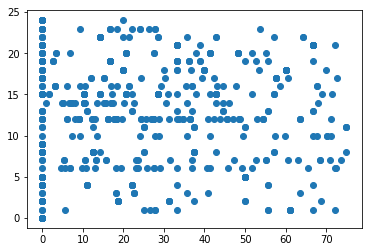

In [15]:
plt.scatter(newdf.absence,newdf.team_id)

In [16]:
is_class_df = newdf[newdf["isClass"] == 1]

In [17]:
team_df =newdf[newdf["isClass"] == 0]

In [25]:
len(newdf['team'].unique())

25

IT Governance 2


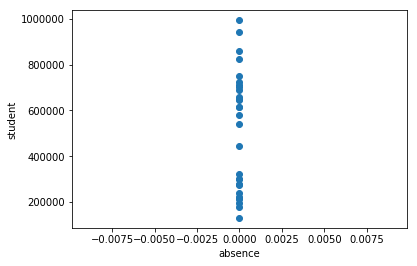

Intro til IT Sikkerhed


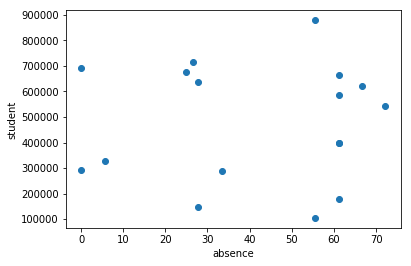

Reverse Eng. Malware


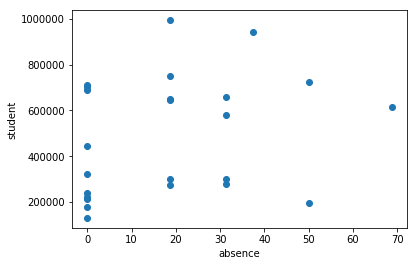

Big Data


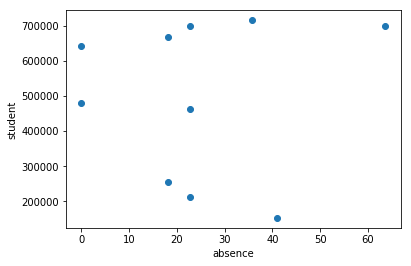

Web Development


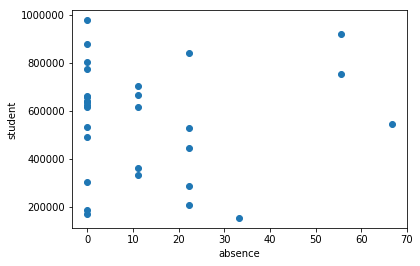

Databases


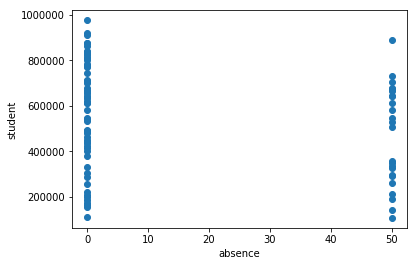

SD18i


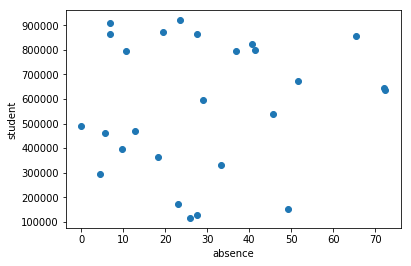

DLS


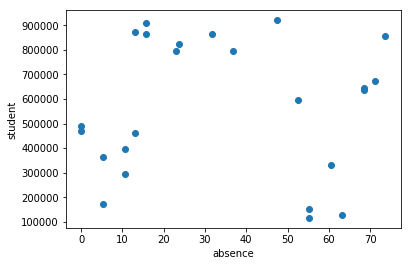

Data Science


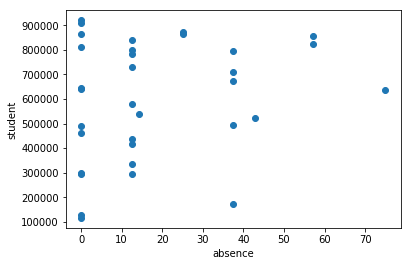

System Integration


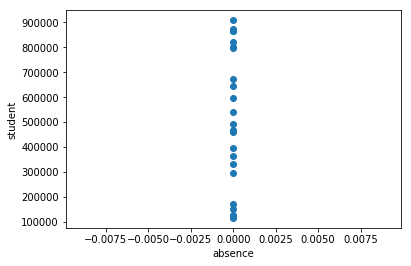

ITS19w1


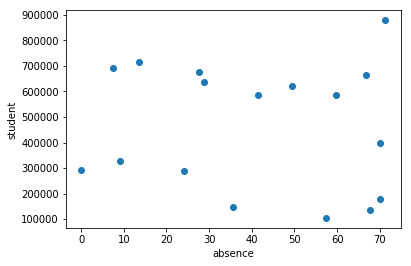

Net. and Com. security


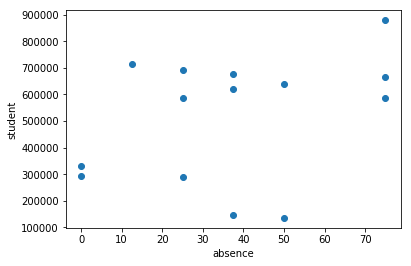

Web and Soft Electives


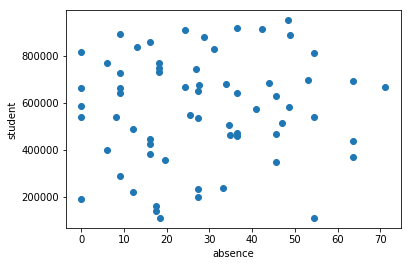

System Security


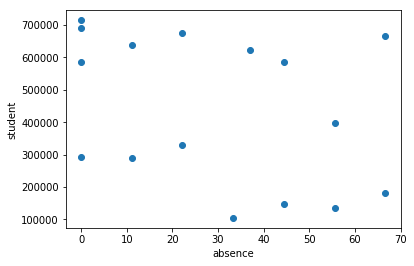

SD19w1


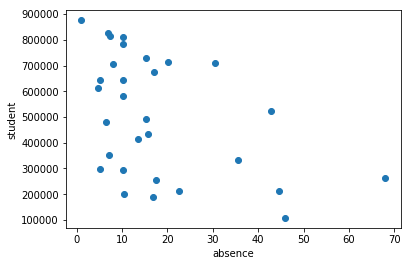

Test


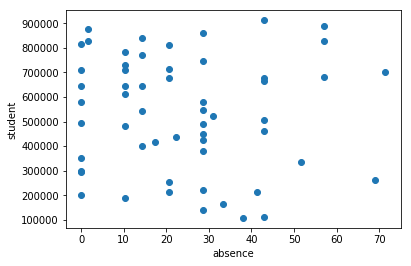

ITS18a


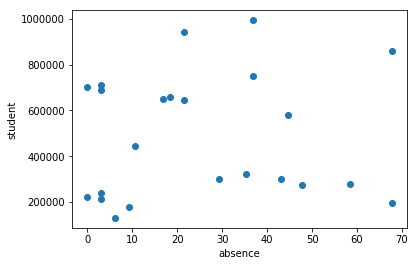

Security Engineering


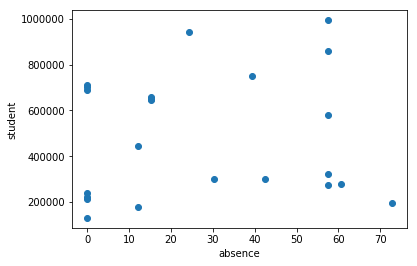

Angular


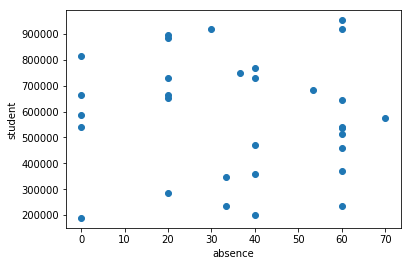

Web Security


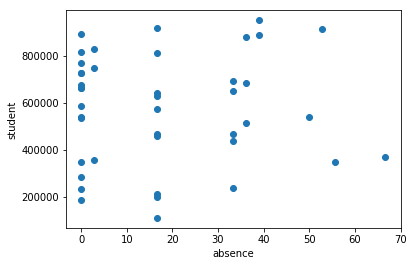

Web19w1


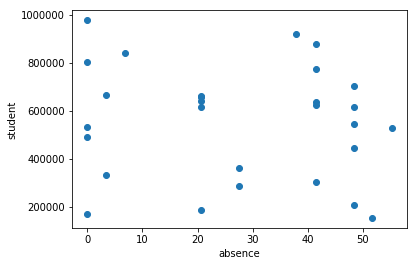

Interface Design


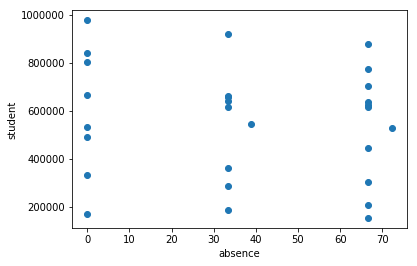

Security for mobile devices


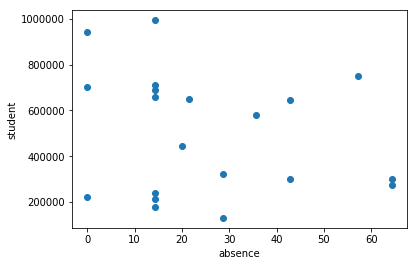

Software Design Patterns


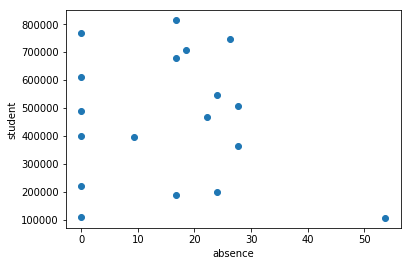

Quantum Computing


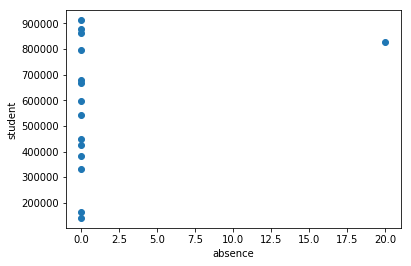

In [32]:
for x in range(len(newdf['team'].unique())):

    tmpdf=newdf[newdf["team_id"] == x]
    print(team_id[x])
    plt.scatter(tmpdf.absence,tmpdf.student)
    plt.xlabel('absence')
    plt.ylabel('student')
    plt.show()
    

IT Governance 2


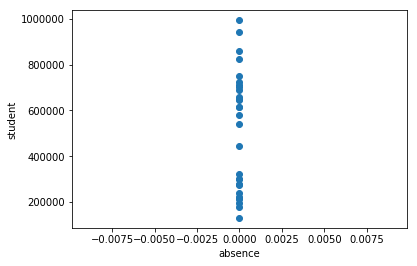

Intro til IT Sikkerhed


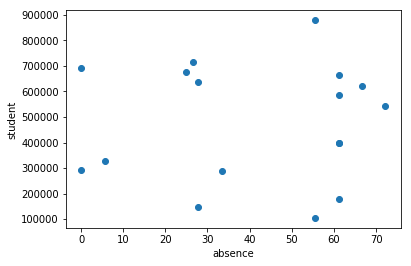

Reverse Eng. Malware


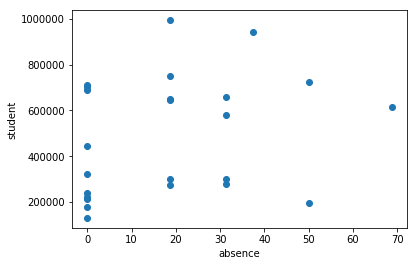

Big Data


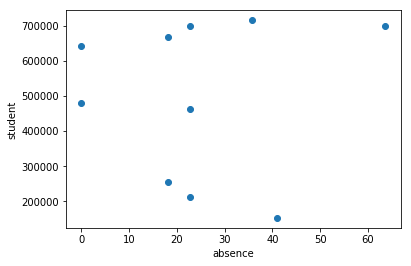

Web Development


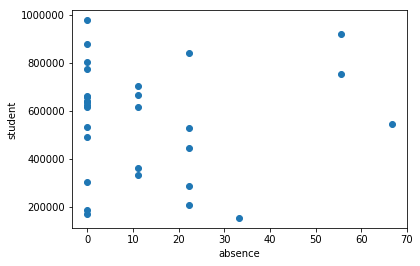

Databases


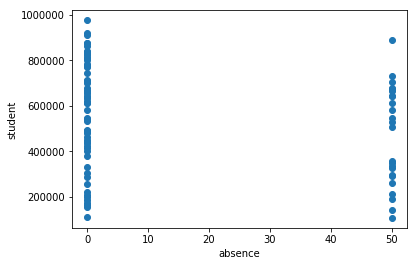

SD18i


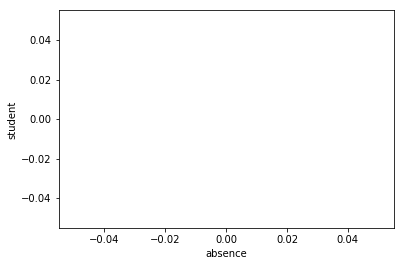

DLS


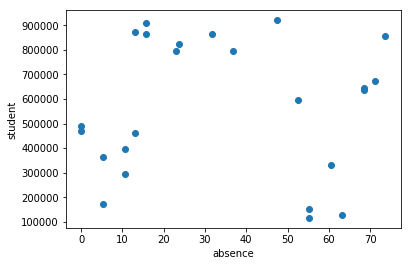

Data Science


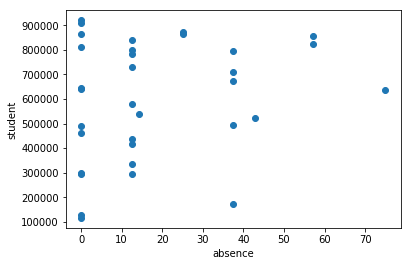

System Integration


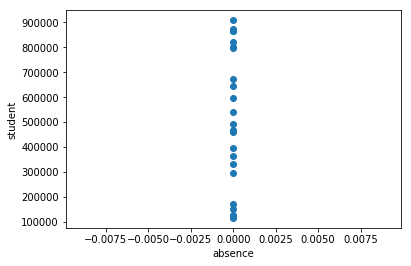

ITS19w1


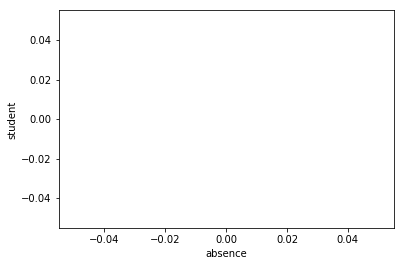

Net. and Com. security


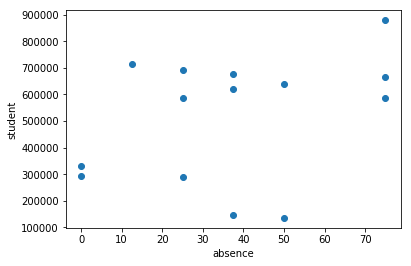

Web and Soft Electives


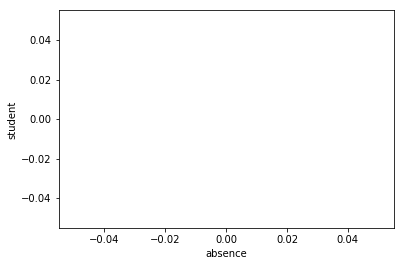

System Security


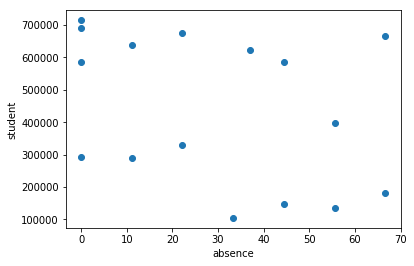

SD19w1


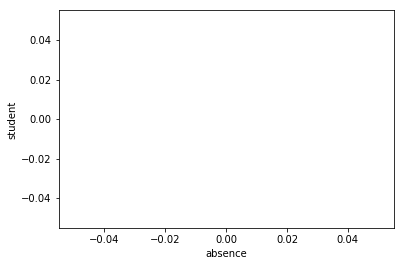

Test


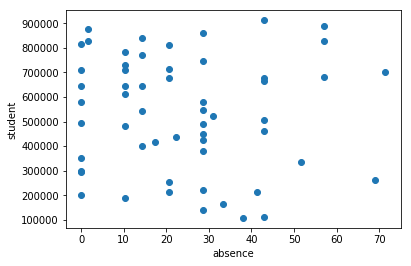

ITS18a


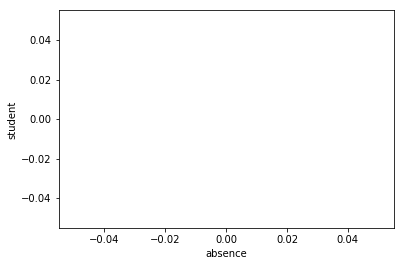

Security Engineering


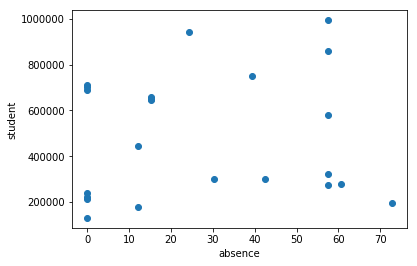

Angular


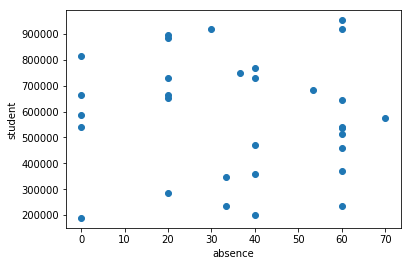

In [33]:
for x in range(len(team_df['team'].unique())):

    tmpdf=team_df[team_df["team_id"] == x]
    print(team_id[x])
    plt.scatter(tmpdf.absence,tmpdf.student)
    plt.xlabel('absence')
    plt.ylabel('student')
    plt.show()
    

In [34]:
team_df

,student,team,team_id,absence,isClass
117,215571.0,IT Governance 2,0,0.00,0.0
122,542155.0,IT Governance 2,0,0.00,0.0
127,825970.0,IT Governance 2,0,0.00,0.0
136,543558.0,Intro til IT Sikkerhed,1,72.22,0.0
147,613200.0,IT Governance 2,0,0.00,0.0
152,615329.0,IT Governance 2,0,0.00,0.0
154,615329.0,Reverse Eng. Malware,2,68.75,0.0
156,699025.0,Big Data,3,63.64,0.0
161,751804.0,Web Development,4,55.56,0.0
166,328555.0,Databases,5,50.00,0.0
